<a href="https://colab.research.google.com/github/carsonjyw/leetcode/blob/main/DSCI351PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Read CSV and creat dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
import seaborn as sns

Read file

In [ ]:
df = pd.read_csv('/content/spotify_ds.csv')

Clean dataset for any null values

In [ ]:
print("NaNs:", df.isnull())
print("shape:", df.shape)
df = df.dropna()
print("shape after drop:", df.shape)

NaNs:       artist   song  duration_ms  explicit   year  popularity  danceability  \
0      False  False        False     False  False       False         False   
1      False  False        False     False  False       False         False   
2      False  False        False     False  False       False         False   
3      False  False        False     False  False       False         False   
4      False  False        False     False  False       False         False   
...      ...    ...          ...       ...    ...         ...           ...   
1995   False  False        False     False  False       False         False   
1996   False  False        False     False  False       False         False   
1997   False  False        False     False  False       False         False   
1998   False  False        False     False  False       False         False   
1999   False  False        False     False  False       False         False   

      energy    key  loudness   mode  speechi

Drop any duplicated value

In [ ]:
dropped = df.drop_duplicates()
print("shape after drop:", dropped.shape)

shape after drop: (1941, 18)


To database using sqlite3

In [ ]:
import sqlite3 as sl

In [ ]:
conn = sl.connect('spotifydb.db')

In [ ]:
curs = conn.cursor()
curs.execute("DROP TABLE IF EXISTS Spotify;")
stmt1 = "CREATE TABLE Spotify (\
artist VARCHAR(41) NOT NULL \
,song VARCHAR(114) NOT NULL\
,duration_ms INTEGER  NOT NULL\
,explicit BOOLEAN NOT NULL\
,year INTEGER  NOT NULL\
,popularity INTEGER  NOT NULL\
,danceability NUMERIC(5,3) NOT NULL\
,energy NUMERIC(6,4) NOT NULL\
,key INTEGER  NOT NULL\
,loudness NUMERIC(7,3) NOT NULL\
,mode BIT  NOT NULL\
,speechiness NUMERIC(6,4) NOT NULL\
,acousticness NUMERIC(8,6) NOT NULL\
,instrumentalness NUMERIC(11,6) NOT NULL\
,liveness NUMERIC(6,4) NOT NULL\
,valence NUMERIC(6,4) NOT NULL\
,tempo NUMERIC(7,3) NOT NULL\
,genre VARCHAR(37) NOT NULL)"
curs.execute(stmt1)
for row in dropped.itertuples():
    stmt2 = "INSERT INTO Spotify (artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre) VALUES (?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?)"
    val = (row[1], row[2], row[3], row[4], row[5], row[6], row[7], row[8], row[9], row[10], row[11],row[12], row[13],row[14], row[15], row[16], row[17], row[18])
    curs.execute(stmt2, val)
    conn.commit()

# User Menu

Please choose from following categories: (Enter a number)
  1. Explore graphs
  2. Explore charts
  3. Exit
2
"Let's explore different charts based on the dataset!
  Please choose from following categories: (Enter a number)
  1. Explore top 10s
  2. Search the dataset on your choice
  -- maybe more --
  3. Exist to main menu
2
What do you want to search? Please select from blow categories (enter a number):
    1. artist name
    2. song name
    3. year
    4. popularity
    5. genre
    6. exit to main menu
1
Which artist do you want to search for? lana
Below is the song info by artist(s): lana, ranked by popularity:
+--------------+-----------------------------------------------------------------------------+--------+--------------+---------+
| artist       | song                                                                        |   year |   popularity | genre   |
|--------------+-----------------------------------------------------------------------------+--------+-------------

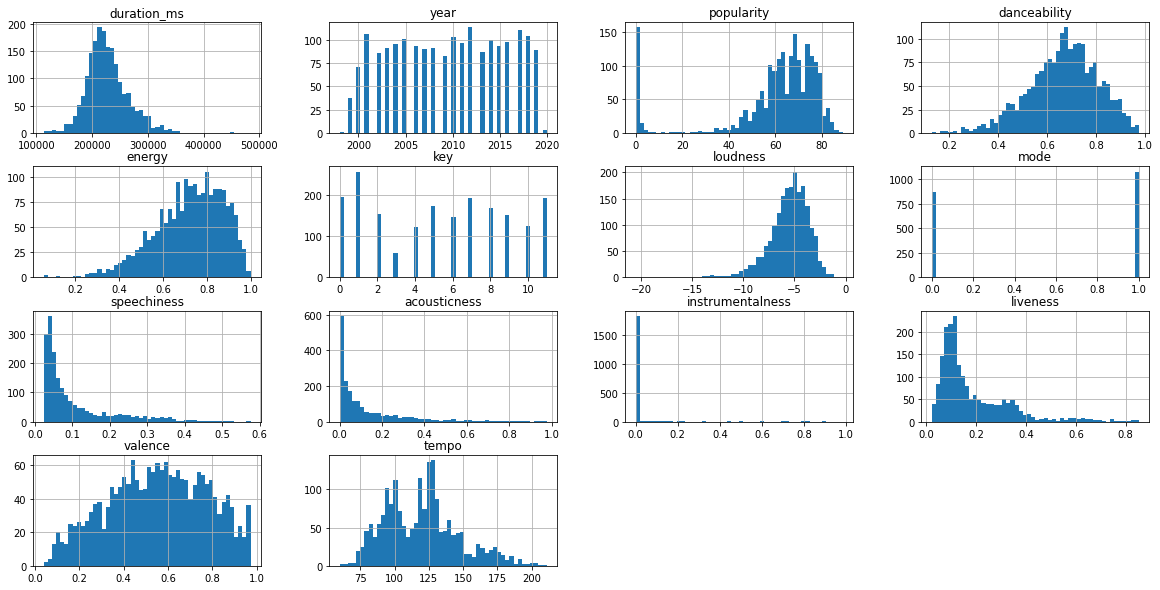

Let's explore different graphs based on the dataset!
  Please choose from following categories: (Enter a number)
  1. Overview of data set by histgram
  2. Overview of data set by heatmap
  3. Explore Mean values of different categories over the years
  4. Explore popularity and one of categories
  5. Explore scatter plot graph of popularity and any other categories on your choice
  6. Exist


KeyboardInterrupt: ignored

In [ ]:
# welcome message
def mainMenu():
  print("""Please choose from following categories: (Enter a number)
  1. Explore graphs
  2. Explore charts
  3. Exit""")

def menuTwo():
  print("""Let's explore different graphs based on the dataset!
  Please choose from following categories: (Enter a number)
  1. Overview of data set by histgram
  2. Overview of data set by heatmap
  3. Explore Mean values of different categories over the years
  4. Explore popularity and one of categories
  5. Explore scatter plot graph of popularity and any other categories on your choice
  6. Exist""")

def menuThree():
  print(""""Let's explore different charts based on the dataset!
  Please choose from following categories: (Enter a number)
  1. Explore top 10s
  2. Search the dataset on your choice
  -- maybe more --
  3. Exist to main menu""")

def subMenuOne():
  print("""Please choose from following categories: (Enter a number)
  1. genre
  2. artist
  3. loudness
  4. energy
  5. danceability
  6. duration_ms
  7. key
  8. speechiness
  9. acousticness
  10. instrumentalness
  11. liveness
  12. valence""")

def subMenuTwo():
  print("""Please choose from following categories: (Enter a number)
  1. loudness
  2. energy
  3. danceability
  4. duration_ms
  5. key
  6. speechiness
  7. acousticness
  8. instrumentalness
  9. liveness
  10. valence
  11. popularity""")

def subMenuThree():
  print("""Please choose from following categories: (Enter a number)
  1. loudness
  2. energy
  3. danceability
  4. duration_ms
  5. key
  6. speechiness
  7. acousticness
  8. instrumentalness
  9. liveness
  10. valence""")

def topTenMenu():
  print("""Let's explore top 10s! Please select from blow categories (enter a number):
    1. best 10 by year
    2. best 10 all the time
    3. worst 10 by year
    4. worst 10 all the time
    5. loudness
    ... other in process ...
    6. exit to main menu""")

def userChoiceMenu():
  print("""What do you want to search? Please select from blow categories (enter a number):
    1. artist name
    2. song name
    3. year
    4. popularity
    5. genre
    6. exit to main menu""")
  
def userChoiceChart():
  cont = 1
  user_input = 1
  while cont == 1:
    userChoiceMenu()
    user_input = int(input())
    if user_input == 1:
      artist_input = input("Which artist do you want to search for? ").lower()
      exploreByArtistName(artist_input)
    elif user_input == 2:
      song_input = input("Which song do you want to search for? ").lower()
      exploreBySongName(song_input)
    elif user_input == 3:
      year_input = int(input("What year do you want to search for? "))
      exploreByYear(year_input)
    elif user_input == 4:
      pop_input = int(input("Please enter a popularity score from 0 to 100? "))
      exploreBypopularity(pop_input)
    elif user_input == 5:
      genre_input = input("Which genre do you want to search for? ").lower()
      exploreByGenre(genre_input)
    elif user_input == 6:
      cont = 0

def topTen():
  cont = 1
  user_input = 1
  while cont == 1:
    topTenMenu()
    user_input = int(input())
    if user_input == 1:
      year_input = input("Please enter a year: ")
      topTenPopularity(year_input)
    elif user_input == 2:
      topAllPopularity()
    elif user_input == 3:
      year_input = input("Please enter a year: ")
      worstTenPopularity(year_input)
    elif user_input == 4:
      worstAllPopularity()
    elif user_input == 5:
      loud_input = int(input("""Do you want to explore the most loudest or quietest? (Please enter a number):
       1. loudest
       2. quietest
       """))
      if loud_input == 1:
        mostLoudest()
      else:
        leastLoudest()
    elif user_input == 6:
      cont = 0

def userMainChoice():
  cont = 1
  user_input = 1
  while cont == 1:
    mainMenu()
    user_input = int(input())
    if user_input == 1:
      userGraphChoice()
    elif user_input == 2:
      userChartChoice()
    elif user_input == 3:
      print("--Thanks for using our system!--")
      cont = 0

def userChartChoice():
  cont = 1
  sub_input = 1
  while cont == 1:
    menuThree()
    user_input = int(input())
    if user_input == 1:
      topTen()
    elif user_input == 2:
      userChoiceChart()
    elif user_input == 3:
      cont = 0

def userGraphChoice():
  cont = 1
  sub_input = 1
  while cont == 1:
    menuTwo()
    sub_input = int(input())
    if sub_input == 1:
      overview()
    elif sub_input == 2:
      heatmap()
    elif sub_input == 3:
      subMenuTwo()
      mean_input = int(input()) 
      if mean_input == 1:
        meanGraph("loudness")
      elif mean_input == 2:
        meanGraph("energy")
      elif mean_input == 3:
        meanGraph("danceability")
      elif mean_input == 4:
        meanGraph("duration_ms")
      elif mean_input == 5:
        meanGraph("key")
      elif mean_input == 6:
        meanGraph("speechiness")
      elif mean_input == 7:
        meanGraph("acousticness")
      elif mean_input == 8:
        meanGraph("instrumentalness")
      elif mean_input == 9:
        meanGraph("liveness")
      elif mean_input == 10:
        meanGraph("valence")
      elif mean_input == 11:
        meanGraph("popularity")
    elif sub_input == 4:
      subMenuOne()
      pop_input = int(input()) 
      if pop_input == 1:
        genrePop()
      elif pop_input == 2:
        print("""Please pick one of following: (Enter a number)
        1. Sum popularity
        2. Average popularity""")
        art_input = int(input())
        if art_input == 1:
          artistSumPop()
        else:
          artistAvgPop()
      elif pop_input == 3:
        popularity("loudness")
      elif pop_input == 4:
        popularity("energy")
      elif pop_input == 5:
        popularity("danceability")
      elif pop_input == 6:
        popularity("duration_ms")
      elif pop_input == 7:
        popularity("key")
      elif pop_input == 8:
        popularity("speechiness")
      elif pop_input == 9:
        popularity("acousticness")
      elif pop_input == 10:
        popularity("instrumentalness")
      elif pop_input == 11:
        popularity("liveness")
      elif pop_input == 12:
        popularity("valence")
    elif sub_input == 5:
      subMenuThree()
      plot_input = int(input()) 
      if plot_input == 1:
        catePop("loudness")
      elif plot_input == 2:
        catePop("energy")
      elif plot_input == 3:
        catePop("danceability")
      elif plot_input == 4:
        catePop("duration_ms")
      elif plot_input == 5:
        catePop("key")
      elif plot_input == 6:
        catePop("speechiness")
      elif plot_input == 7:
        catePop("acousticness")
      elif plot_input == 8:
        catePop("instrumentalness")
      elif plot_input == 9:
        catePop("liveness")
      elif plot_input == 10:
        catePop("valence")
    elif sub_input == 6:
      cont = 0

def main():
  userMainChoice()

main()

# Code



**Graphs**

Mean loudness/energy/danceability/duration_ms/key/speechiness/acousticness/instrumentalness/liveness/valence/popularity over the years

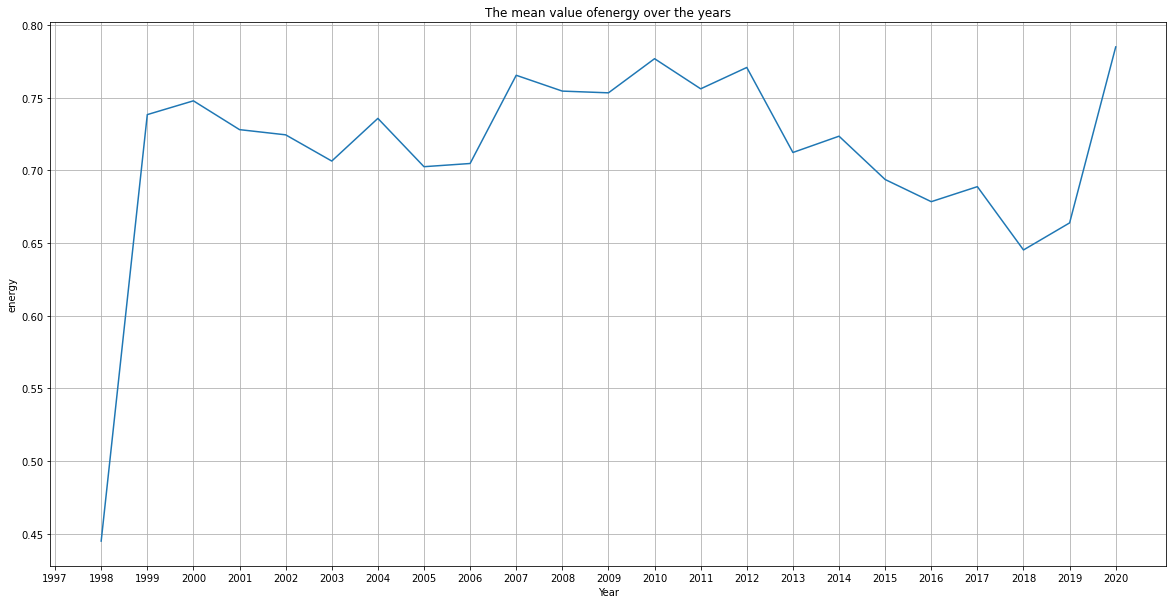

In [ ]:
def meanGraph(cat):
  stmt = "SELECT year, AVG(" + cat + ") FROM Spotify GROUP BY year;"
  curs.execute(stmt)
  result = curs.fetchall()
  year = []
  mean = []
  for i in result:
    year.append(i[0])
  for i in result:
    mean.append(i[1])
  year, mean = zip(*sorted(zip(year, mean)))
  fig, ax = plt.subplots(figsize=(20, 10))
  ax.set_xticks(range(1995, 2021, 1))
  ax.set_xlabel('Year')
  ax.set_ylabel(cat)
  ax.set_title("The mean value of" + cat + " over the years")
  ax.plot(year, mean)
  plt.grid()
  plt.show()
# e.g.
meanGraph("energy")

Popularity and loudness/energy/danceability/duration_ms/key/speechiness/acousticness/instrumentalness/liveness/valence

Popularity and loudness


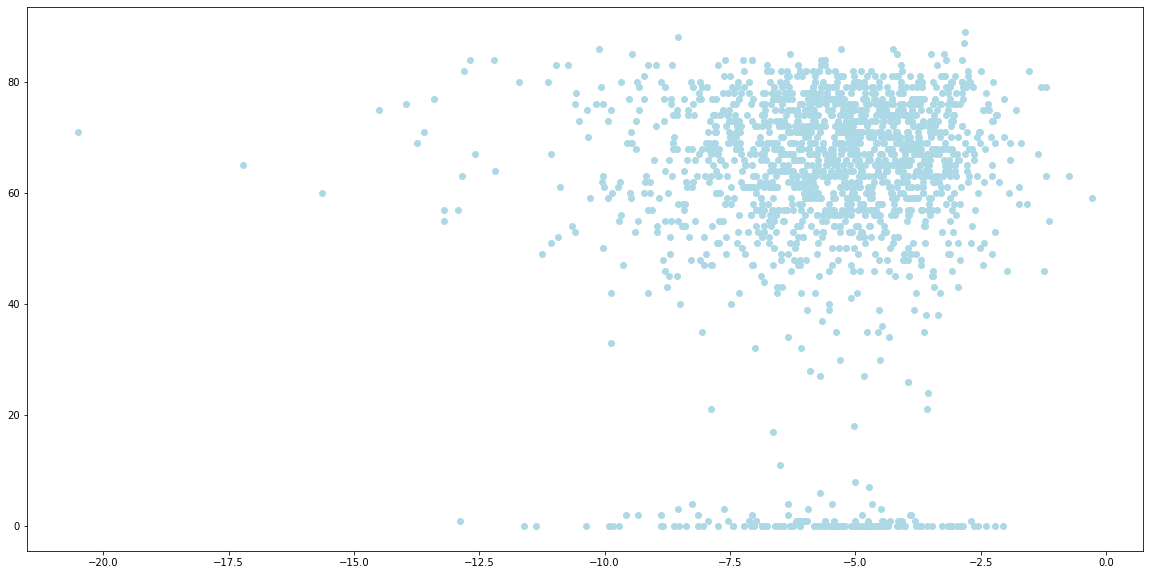

Popularity and energy


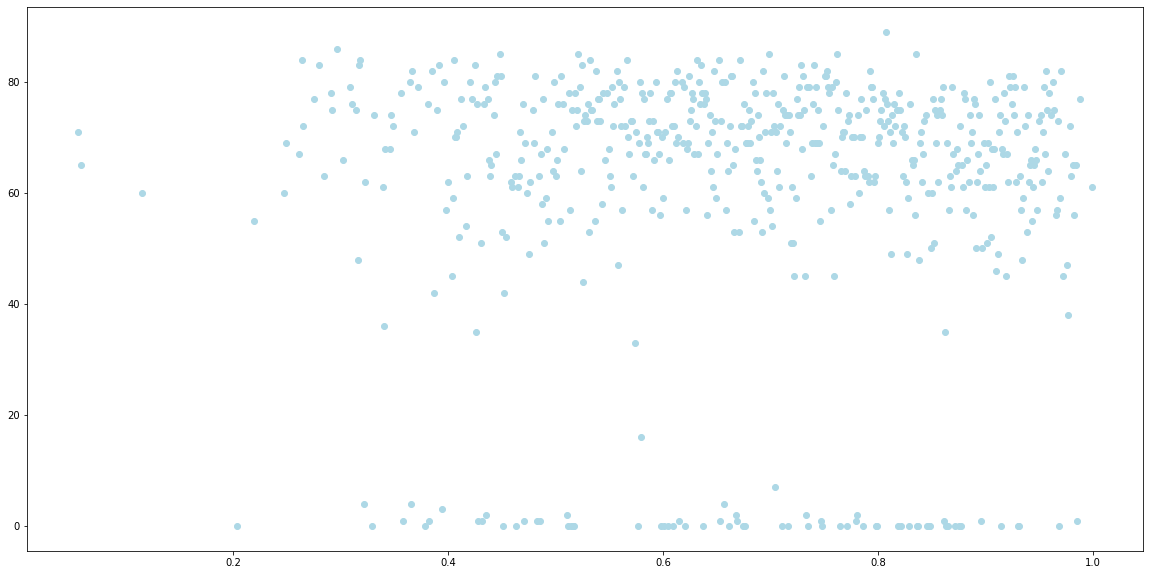

In [ ]:
# user can choose one the the categories
def catePop(cat):
  stmt = "SELECT " + cat + ", popularity FROM Spotify GROUP BY " + cat + ";"
  curs.execute(stmt)
  result = curs.fetchall()
  cat_data = []
  popularity = []
  for i in result:
    cat_data.append(i[0])
  for i in result:
    popularity.append(i[1])
  plt.figure(figsize = (20,10))
  plt.scatter(cat_data, popularity, c ="lightblue")
  plt.show()

# e.g.
print("Popularity and loudness")
catePop("loudness")
print("Popularity and energy")
catePop("energy")

Heatmap:

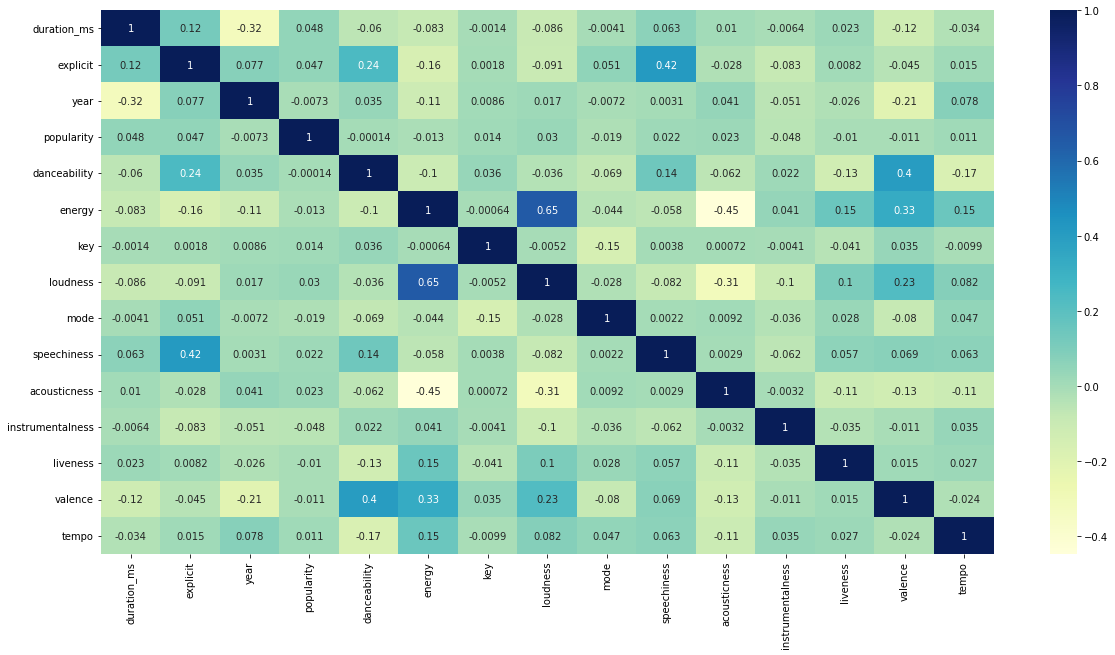

In [ ]:
def heatmap():
  plt.figure(figsize = (20,10))
  sns.heatmap(dropped.corr(), cmap="YlGnBu", annot=True);
  plt.show()
heatmap()

Overview of the dataset:

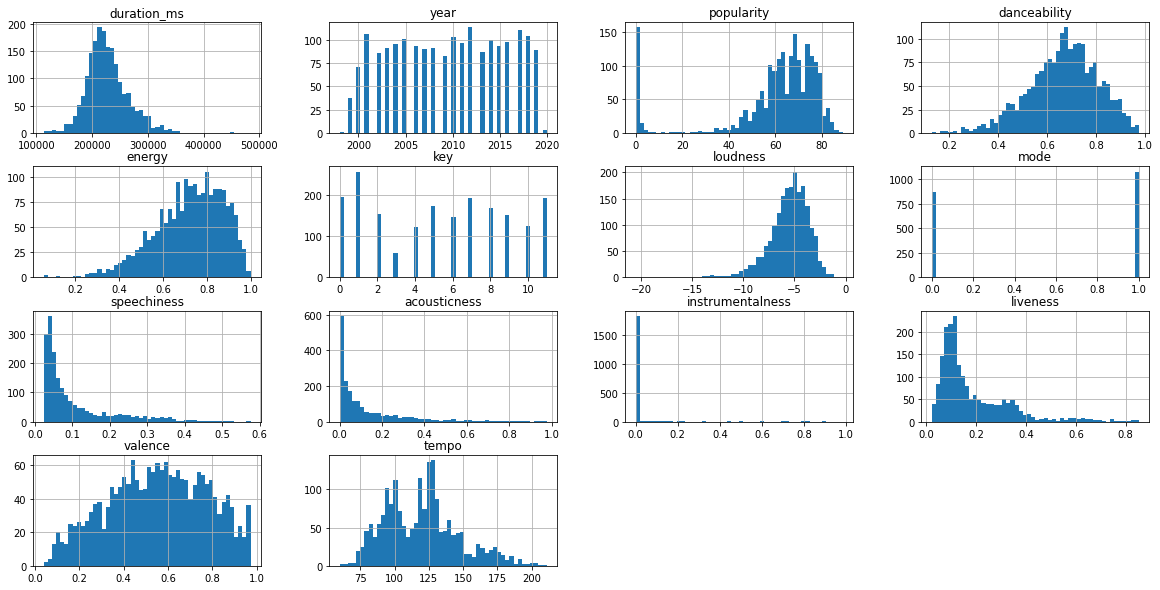

In [ ]:
def overview():
  dropped.hist(figsize=(20,10), bins=50)
  plt.show()
overview()

number of song and loudness/energy/danceability/duration_ms/key/speechiness/acousticness/instrumentalness/liveness/valence

In [ ]:
from pandas._libs.lib import generate_bins_dt64

acousticness


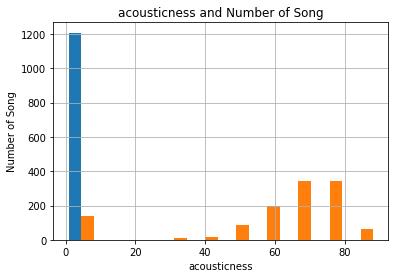

duration_ms


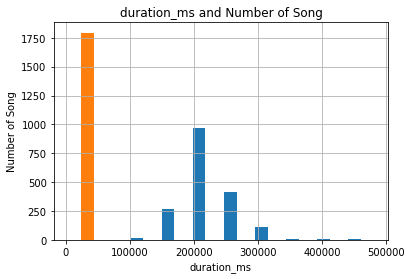

In [ ]:
# user can choose one the the categories
def popularity(cat):
    stmt = "SELECT popularity, " + cat + " FROM Spotify GROUP BY " + cat + ";"
    curs.execute(stmt)
    result = curs.fetchall()
    score = []
    for i in result:
      score.append(round(i[1]))
    num_song = []
    for y in result:
      num_song.append(y[0])
    score, num_song = zip(*sorted(zip(score, num_song)))
    plt.hist([score, num_song])
    plt.xlabel(cat)
    plt.ylabel("Number of Song")
    plt.title(cat + " and Number of Song")
    plt.grid()
    plt.show()

#e.g.
print("acousticness")
popularity("acousticness")
print("duration_ms")
popularity("duration_ms")

Top 50 artist and their songs' sum popularity

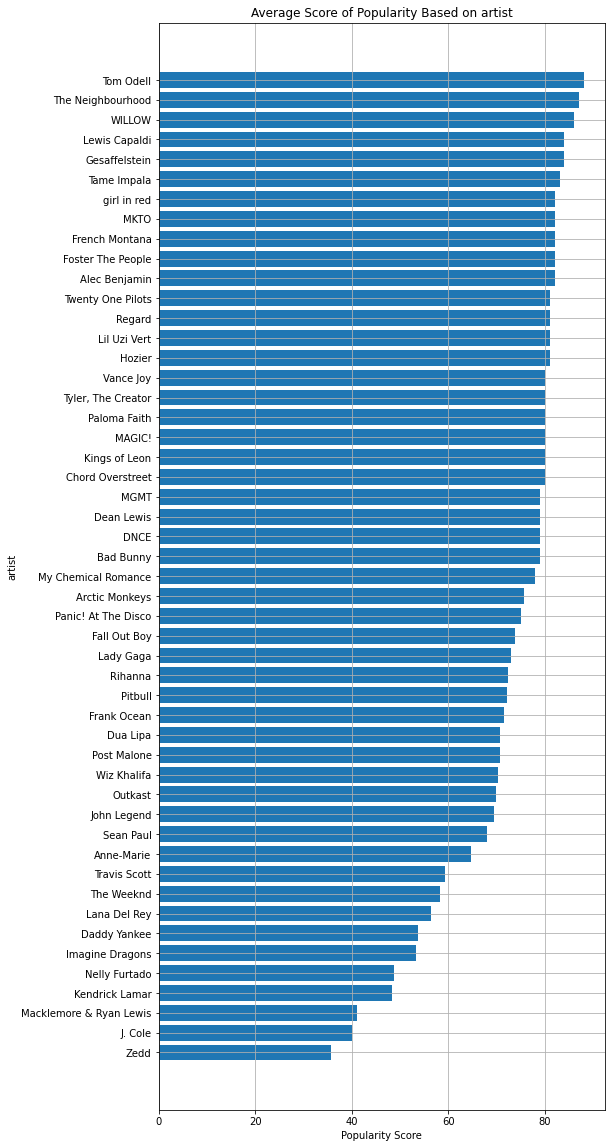

In [ ]:
def artistSumPop():
  stmt = "SELECT artist, SUM(popularity) AS SUM_Popularity FROM Spotify GROUP BY artist ORDER BY popularity DESC LIMIT 50;"
  curs.execute(stmt)
  result = curs.fetchall()
  SUM_score = []
  for i in result:
    SUM_score.append(i[1])
  artist = []
  for y in result:
    artist.append(y[0])
  SUM_score, artist = zip(*sorted(zip(SUM_score, artist)))
  plt.figure(figsize=(8,20))
  plt.barh(artist, SUM_score)
  plt.xlabel("Popularity Score")
  plt.ylabel("artist")
  plt.title("Sum Score of Popularity Based on artist")
  plt.grid()
  plt.show()
artistPop()

Top 50 artist and their songs' average popularity

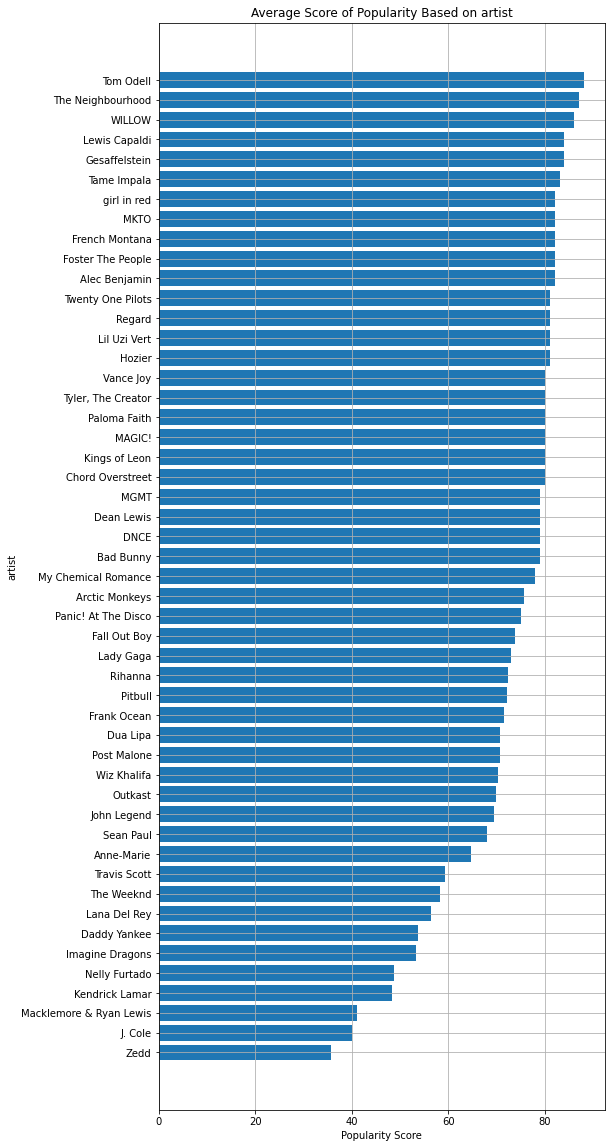

In [ ]:
def artistAvgPop():
  stmt = "SELECT artist, AVG(popularity) AS AVG_Popularity FROM Spotify GROUP BY artist ORDER BY popularity DESC LIMIT 50;"
  curs.execute(stmt)
  result = curs.fetchall()
  avg_score = []
  for i in result:
    avg_score.append(i[1])
  artist = []
  for y in result:
    artist.append(y[0])
  avg_score, artist = zip(*sorted(zip(avg_score, artist)))
  plt.figure(figsize=(8,20))
  plt.barh(artist, avg_score)
  plt.xlabel("Popularity Score")
  plt.ylabel("artist")
  plt.title("Average Score of Popularity Based on artist")
  plt.grid()
  plt.show()
artistPop()

Each genre and its average popularity 

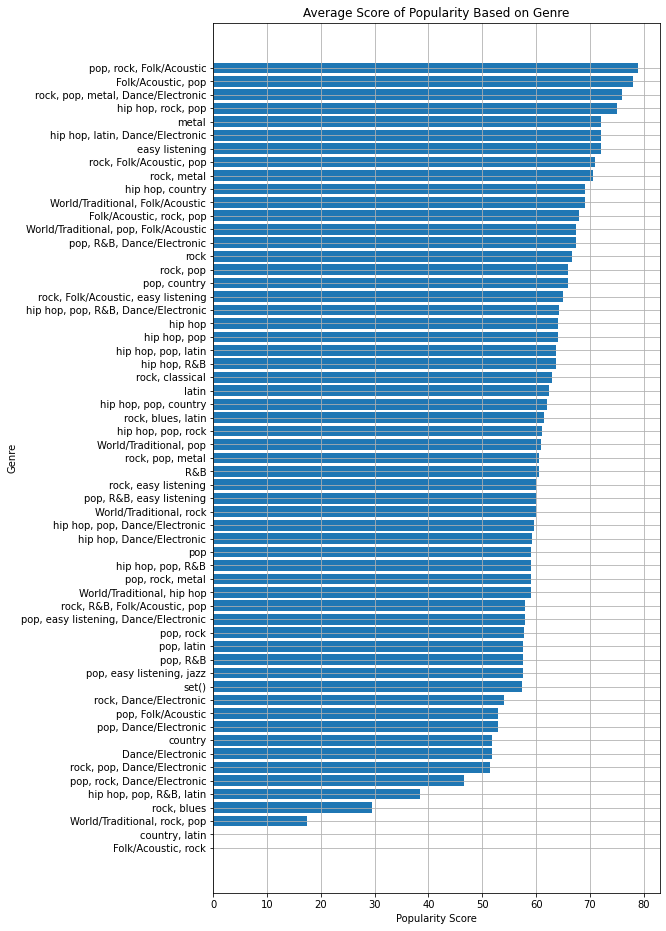

In [ ]:
def genrePop():
  stmt = "SELECT genre, AVG(popularity) AS AVG_Popularity FROM Spotify GROUP BY genre ORDER BY popularity DESC;"
  curs.execute(stmt)
  result = curs.fetchall()
  avg_score = []
  for i in result:
    avg_score.append(i[1])
  genre = []
  for y in result:
    genre.append(y[0])
  avg_score, genre = zip(*sorted(zip(avg_score, genre)))
  plt.figure(figsize=(8,16))
  plt.barh(genre, avg_score)
  plt.xlabel("Popularity Score")
  plt.ylabel("Genre")
  plt.title("Average Score of Popularity Based on Genre")
  plt.grid()
  plt.show()
genrePop()

Top 10s: (still in process)





In [ ]:
# def topTenMenu():
#   user_input = int(input("""Let's explore top 10s! Please select from blow categories (enter a number):
#     1. best 10 by year
#     2. best 10 all the time
#     3. worst 10 by year
#     4. worst 10 all the time
#     5. loudness
#     ... more ...
#     6. exit to main menu
# """))
#   if user_input == 1:
#     year_input = input("Please enter a year: ")
#     topTenPopularity(year_input)
#   elif user_input == 2:
#     topAllPopularity()
#   elif user_input == 3:
#     year_input = input("Please enter a year: ")
#     worstTenPopularity(year_input)
#   elif user_input == 4:
#     worstAllPopularity()
#   elif user_input == 5:
#     loud_input = int(input("""Do you want to explore the most loudest or quietest? (Please enter a number):
#      1. loudest
#      2. quietest
#   """))
#     if loud_input == 1:
#       mostLoudest()
#     else:
#       leastLoudest()

Top 10 Loudness

In [ ]:
def mostLoudest():
  stmt = 'SELECT loudness, artist, song, year, popularity, genre FROM Spotify ORDER BY loudness ASC LIMIT 10;'
  curs.execute(stmt)
  result = curs.fetchall()
  if len(result) == 0:
    print("Sorry, based on your search, we cannot find anything in out system.")
  else:
    print("The most loudest 10 songs all the time:")
    print(tabulate(result, headers=["loudness", "artist", "song", "year", "popularity", "genre"], tablefmt='psql'))

def leastLoudest():
  stmt = 'SELECT loudness, artist, song, year, popularity, genre FROM Spotify ORDER BY loudness DESC LIMIT 10;'
  curs.execute(stmt)
  result = curs.fetchall()
  if len(result) == 0:
    print("Sorry, based on your search, we cannot find anything in out system.")
  else:
    print("The most quietest 10 songs all the time:")
    print(tabulate(result, headers=["loudness", "artist", "song", "year", "popularity", "genre"], tablefmt='psql'))

Worst top 10 popular songs based on year/ all the time

In [ ]:
def worstTenPopularity(year):
  stmt = 'SELECT artist, song, year, popularity, genre FROM Spotify WHERE year=? ORDER BY popularity ASC LIMIT 10;'
  v = (year,)
  curs.execute(stmt, v)
  result = curs.fetchall()
  if len(result) == 0:
    print("Sorry, based on your search, we cannot find anything in out system.")
  else:
    print("Worst 10 songs in year of " + str(year) + ":")
    print(tabulate(result, headers=["artist", "song", "year", "popularity", "genre"], tablefmt='psql'))

def worstAllPopularity():
  stmt = 'SELECT artist, song, year, popularity, genre FROM Spotify ORDER BY popularity ASC LIMIT 10;'
  curs.execute(stmt)
  result = curs.fetchall()
  if len(result) == 0:
    print("Sorry, based on your search, we cannot find anything in out system.")
  else:
    print("Worst 10 songs all the time:")
    print(tabulate(result, headers=["artist", "song", "year", "popularity", "genre"], tablefmt='psql'))

Top 10 popular songs based on year/ all the time

In [ ]:
def topTenPopularity(year):
  stmt = 'SELECT artist, song, year, popularity, genre FROM Spotify WHERE year=? ORDER BY popularity DESC LIMIT 10;'
  v = (year,)
  curs.execute(stmt, v)
  result = curs.fetchall()
  if len(result) == 0:
    print("Sorry, based on your search, we cannot find anything in out system.")
  else:
    print("Top 10 songs in year of " + str(year) + ":")
    print(tabulate(result, headers=["artist", "song", "year", "popularity", "genre"], tablefmt='psql'))

def topAllPopularity():
  stmt = 'SELECT artist, song, year, popularity, genre FROM Spotify ORDER BY popularity DESC LIMIT 10;'
  curs.execute(stmt)
  result = curs.fetchall()
  if len(result) == 0:
    print("Sorry, based on your search, we cannot find anything in out system.")
  else:
    print("Top 10 songs all the time:")
    print(tabulate(result, headers=["artist", "song", "year", "popularity", "genre"], tablefmt='psql'))


Search to show charts 

In [ ]:
# user_input = int(input("""What do you want to search? Please select from blow categories (enter a number):
#     1. artist name
#     2. song name
#     3. year
#     4. popularity
#     5. genre
#     6. exit to main menu
# """))

# if user_input == 1:
#   artist_input = input("Which artist do you want to search for? ").lower()
#   exploreByArtistName(artist_input)
# elif user_input == 2:
#   song_input = input("Which song do you want to search for? ").lower()
#   exploreBySongName(song_input)
# elif user_input == 3:
#   year_input = int(input("What year do you want to search for? "))
#   exploreByYear(year_input)
# elif user_input == 4:
#   pop_input = int(input("Please enter a popularity score from 0 to 100? "))
#   exploreBypopularity(pop_input)
# elif user_input == 5:
#   genre_input = input("Which genre do you want to search for? ").lower()
#   exploreByGenre(genre_input)

Explore by popularity:

In [ ]:
def exploreBypopularity(popularity):
  stmt = 'SELECT artist, song, year, popularity, genre FROM Spotify WHERE popularity=?;'
  v = (popularity,)
  curs.execute(stmt,v)
  result = curs.fetchall()
  if len(result) == 0:
    print("Sorry, based on your search, there is no song at the score of " + str(popularity) + ". Please try an another score.")
  else:
    print("Below is the song info at popularity score of " + str(popularity) + ": ")
    print(tabulate(result, headers=["artist", "song", "year", "popularity", "genre"], tablefmt='psql'))

Explore by artist name:

In [ ]:
def exploreByArtistName(artist):
  stmt = 'SELECT artist, song, year, popularity, genre FROM Spotify WHERE artist LIKE ? ORDER BY popularity DESC;'
  v = ("%{}%".format(artist),)
  curs.execute(stmt,v)
  result = curs.fetchall()
  if len(result) == 0:
    print("Sorry, based on your search, we cannot find anything in out system.")
  else:
    print("Below is the song info by artist(s): " + artist + ", ranked by popularity:")
    print(tabulate(result, headers=["artist", "song", "year", "popularity", "genre"], tablefmt='psql'))

Explore by song name:

In [ ]:
def exploreBySongName(song):
  stmt = 'SELECT artist, song, year, popularity, genre FROM Spotify WHERE song LIKE ? ORDER BY popularity DESC;'
  v = ("%{}%".format(song),)
  curs.execute(stmt,v)
  result = curs.fetchall()
  if len(result) == 0:
    print("Sorry, based on your search, we cannot find anything in out system.")
  else:
    print("Below is the song info ranked by popularity related to your search of " + song + ":")
    print(tabulate(result, headers=["artist", "song", "year", "popularity", "genre"], tablefmt='psql'))

Explore by genre:

In [ ]:
def exploreByGenre(genre):
  stmt = 'SELECT artist, song, year, popularity, genre FROM Spotify WHERE genre LIKE ? ORDER BY popularity DESC;'
  v = ("%{}%".format(genre),)
  curs.execute(stmt,v)
  result = curs.fetchall()
  if len(result) == 0:
    print("Sorry, based on your search, we cannot find anything in out system.")
  else:
    print("Below is the song info ranked by popularity in genre of " + genre + ":")
    print(tabulate(result, headers=["artist", "song", "year", "popularity", "genre"], tablefmt='psql'))

Explore by year:

In [ ]:
def exploreByYear(year):
  stmt = 'SELECT artist, song, year, popularity, genre FROM Spotify WHERE year=? ORDER BY popularity DESC;'
  v = (year,)
  curs.execute(stmt, v)
  result = curs.fetchall()
  if len(result) == 0:
    print("Sorry, based on your search, we cannot find anything in out system.")
  else:
    print("Below is the song info ranked by popularity in year of " + str(year) + ":")
    print(tabulate(result, headers=["artist", "song", "year", "popularity", "genre"], tablefmt='psql'))

Slider menu to help calculate pay-per-stream (PPS)

Note: EACH STREAM = $0.004

In [ ]:
# Imports for JupyterLite
try:
    import piplite
    await piplite.install(['ipywidgets'])
except ImportError:
    pass

In [ ]:
import ipywidgets as widgets

In [ ]:
widgets.FloatSlider(
    value=.0,
    min=0,
    max=200000000000,
    step=.004,
    description='Test:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
)

FloatSlider(value=0.0, continuous_update=False, description='Test:', max=200000000000.0, readout_format='.1f',…